In [1]:
import cv2
from darkflow.net.build import TFNet
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'
import tensorflow as tf

W0711 21:40:34.033646 4635923904 deprecation_wrapper.py:119] From /Users/kevin.nguyen/Projects/darkflow/darkflow/net/build.py:15: The name tf.train.RMSPropOptimizer is deprecated. Please use tf.compat.v1.train.RMSPropOptimizer instead.

W0711 21:40:34.034431 4635923904 deprecation_wrapper.py:119] From /Users/kevin.nguyen/Projects/darkflow/darkflow/net/build.py:16: The name tf.train.AdadeltaOptimizer is deprecated. Please use tf.compat.v1.train.AdadeltaOptimizer instead.

W0711 21:40:34.034951 4635923904 deprecation_wrapper.py:119] From /Users/kevin.nguyen/Projects/darkflow/darkflow/net/build.py:17: The name tf.train.AdagradOptimizer is deprecated. Please use tf.compat.v1.train.AdagradOptimizer instead.

W0711 21:40:34.035535 4635923904 deprecation_wrapper.py:119] From /Users/kevin.nguyen/Projects/darkflow/darkflow/net/build.py:18: The name tf.train.AdagradDAOptimizer is deprecated. Please use tf.compat.v1.train.AdagradDAOptimizer instead.

W0711 21:40:34.036065 4635923904 deprecation_w

In [7]:
options = {
    "model":"cfg/yolov2-voc-1c.cfg",
    "threshold":0.3,
    "load":-1
}

In [8]:
tfnet2 = TFNet(options)

Parsing cfg/yolov2-voc-1c.cfg
Loading None ...
Finished in 0.0001621246337890625s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 32)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 64)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 128)
 Init  |  Yep!  | conv 1x1p0_1  +bnorm  leaky      | (?, 104, 104, 64)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 128)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 256)
 Init  |  Yep!  | conv 1x1p0_1  +bnorm  leaky      | (?, 5

In [9]:
tfnet2.load_from_ckpt()

Loading from ./ckpt/yolov2-voc-1c-1000


In [4]:
import numpy as np

def plot_box(original_img, predictions):
    newImage = np.copy(original_img)
    
    for result in predictions:
        
        top_x = result['topleft']['x']
        top_y = result['topleft']['y']
        
        bot_x = result['bottomright']['x']
        bot_y = result['bottomright']['y']
        
        conficence = result['confidence'] * 100
        label = result['label'] + " " + str(round(conficence, 2))
        
        newImage = cv2.rectangle(newImage, (top_x, top_y), (bot_x, bot_y), (255,0,0), 2)
        newImage = cv2.putText(newImage, label, (top_x, top_y -5), cv2.FONT_ITALIC, 1, (0,20, 0), 2)
        
    return newImage

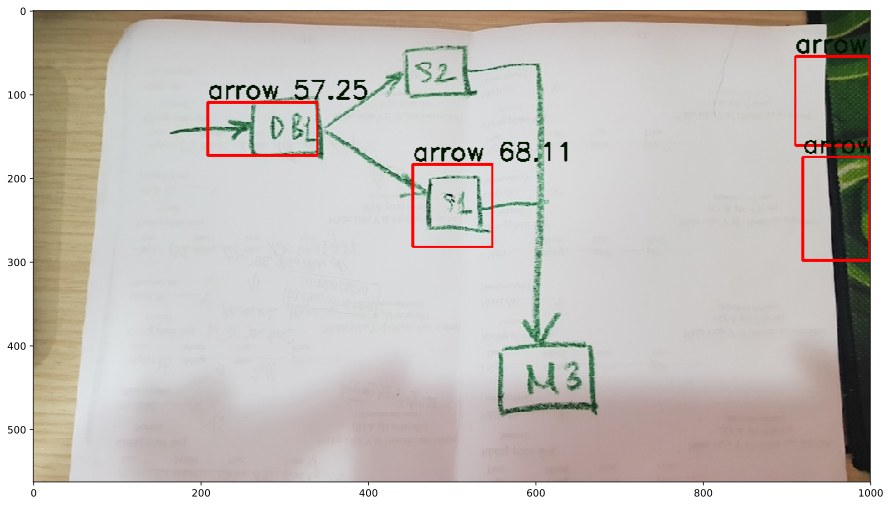

In [22]:
%matplotlib inline
orignal_img = cv2.imread('/Users/kevin.nguyen/Downloads/test5.jpg')
orignal_img = cv2.cvtColor(orignal_img, cv2.COLOR_BGR2RGB)
results = tfnet2.return_predict(orignal_img)
#print(results)

#fix, ax = plt.subplots(figsize=(15,10))
#ax.imshow(orignal_img)

fig, ax = plt.subplots(figsize=(15, 10))
ax.imshow(plot_box(orignal_img, results))

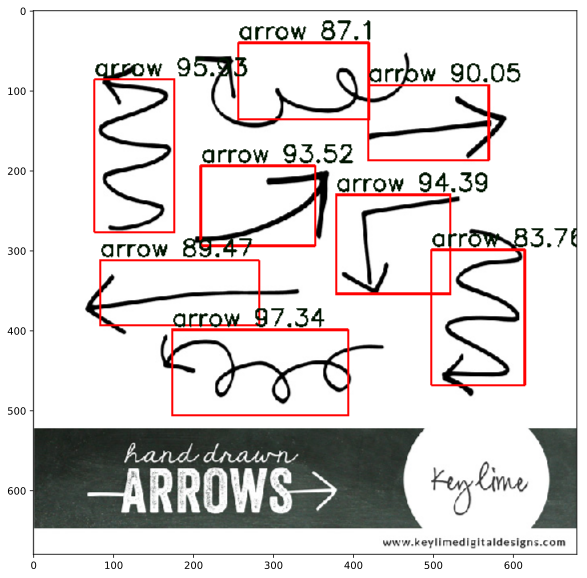

In [19]:
orignal_img = cv2.imread('train/images/000022.jpg')
orignal_img = cv2.cvtColor(orignal_img, cv2.COLOR_BGR2RGB)
results = tfnet2.return_predict(orignal_img)
#print(results)

#fix, ax = plt.subplots(figsize=(15,10))
#ax.imshow(orignal_img)

fig, ax = plt.subplots(figsize=(15, 10))
ax.imshow(plot_box(orignal_img, results))

In [24]:
options_head = {
    "model":"cfg/yolov2-voc-1c-arrow-head.cfg",
    "threshold":0.3,
    "load":-1
}

In [25]:
tfheadarrow = TFNet(options_head)

Parsing cfg/yolov2-voc-1c-arrow-head.cfg
Loading None ...
Finished in 0.0020990371704101562s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 32)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 64)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 128)
 Init  |  Yep!  | conv 1x1p0_1  +bnorm  leaky      | (?, 104, 104, 64)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 128)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 256)
 Init  |  Yep!  | conv 1x1p0_1  +bnorm  leaky  

In [26]:
tfheadarrow.load_from_ckpt()

Loading from ./ckpt/yolov2-voc-1c-arrow-head-1000


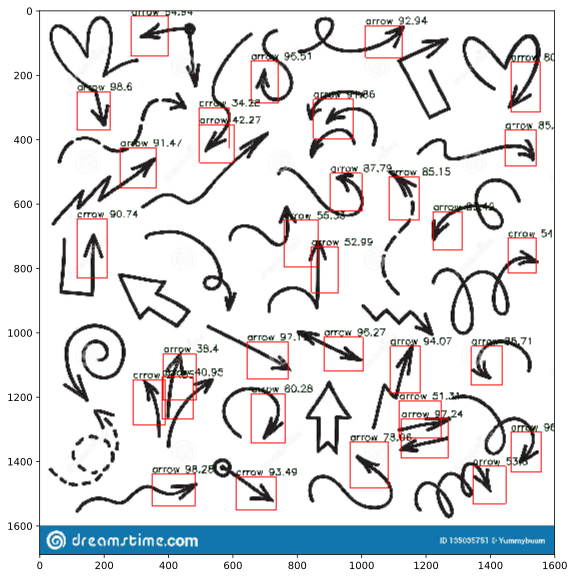

In [42]:
orignal_img = cv2.imread('train/images_small_arrow/000035.jpg')
orignal_img = cv2.cvtColor(orignal_img, cv2.COLOR_BGR2RGB)
results = tfheadarrow.return_predict(orignal_img)
#print(results)

#fix, ax = plt.subplots(figsize=(15,10))
#ax.imshow(orignal_img)

fig, ax = plt.subplots(figsize=(15, 10))
ax.imshow(plot_box(orignal_img, results))